<a href="https://www.kaggle.com/code/amirmahdavieh79/cookie-cats-a-b-testing?scriptVersionId=177883554" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Please complete this notebook based on what you have learned about the steps of an A/B test. Use the 'cookie_cats.txt' dataset for reference**.

### 1. Define the Problem  
Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level.  

As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.  
  
But where should the gates be placed? Initially the first gate was placed at level 30, but in this notebook we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular, we will look at the impact on player retention. But before we get to that, a key step before undertaking any analysis is understanding the data.

Analyzing Game Metrics: A Threefold Exploration into Session Increase and Player Retention  

**Question 1: Has the average number of game sessions increased by 5 sessions?**

**Question 2: Has player retention increased by 2% after 1 day?**
  
**Question 3: Has player retention increased by 5% after 7 days?**

# Table of Contents
* [General Analysis](#Section-zero)
* [Q1: Has the average number of game sessions increased by 5 sessions?](#Section-one)
* [Q2: Has player retention increased by 2% after 1 day?](#Section-two)
* [Q3: Has player retention increased by 5% after 7 days?](#Section-three)

## General Analysis <a id="Section-zero" ></a>

In [1]:
# import the data
import pandas as pd
df = pd.read_csv('/kaggle/input/cookie_cats.txt')

In [2]:
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [3]:
# check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


gate_30: control group

gate_40: treatment group

-------------------------------

Type 1 Error (alpha): 0.05

Type 2 Error (beta): 0.2

In [4]:
# Idenfity the duplicates based on 'userid'
duplicates = df[df.duplicated('userid', keep=False)]

if duplicates.empty:
    print('null')
else:
    df = df.drop_duplicates(subset='userid')

null


Number of outliers in 'sum_gamerounds': 10177


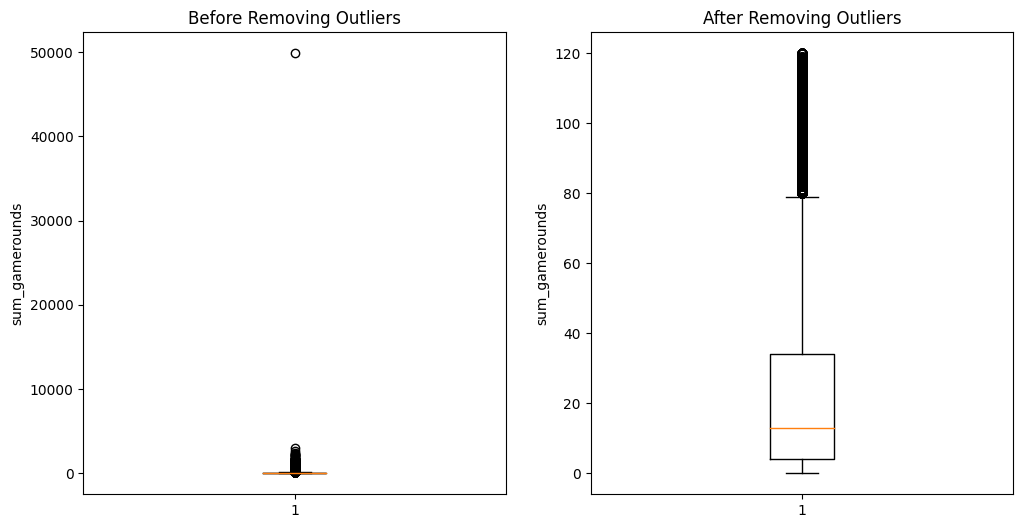

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['sum_gamerounds'].quantile(0.25)
Q3 = df['sum_gamerounds'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating subplot 1 (Before Removing Outliers)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['sum_gamerounds'])
plt.title('Before Removing Outliers')
plt.ylabel('sum_gamerounds')

# Detect outliers
outliers = df[(df['sum_gamerounds'] < lower_bound) | (df['sum_gamerounds'] > upper_bound)]
number_of_outliers = len(outliers)

# Remove outliers
df = df[(df['sum_gamerounds'] >= lower_bound) & (df['sum_gamerounds'] <= upper_bound)]

# Creating subplot 2 (After Removing Outliers)
plt.subplot(1, 2, 2)
plt.boxplot(df['sum_gamerounds'])
plt.title('After Removing Outliers')
plt.ylabel('sum_gamerounds')

# Print the number of outliers
print(f"Number of outliers in 'sum_gamerounds': {number_of_outliers}")


## Question 1 <a id="Section-one" ></a>
- One categorical (version) and one continues group (sum_gamerounds) -> t-test
- Define the A and B groups: gate_30 = A (Control Group), gate_40 = B (Treatment Group)



* Null Hypothesis (H0): The average number of game sessions in the version with the gate at level 40 has not increased by 5 sessions compared to the version with the gate at level 30. 
* Alternative Hypothesis (H1): The average number of game sessions in the version with the gate at level 40 has increased by 5 sessions compared to the version with the gate at level 30.


In [6]:
group30 = df[df['version'] == 'gate_30']
group40 = df[df['version'] == 'gate_40']

average_gamerounds30 = group30['sum_gamerounds'].mean()
average_gamerounds40 = group40['sum_gamerounds'].mean()

if average_gamerounds40 - average_gamerounds30 >= 5:
    print("The average number of game sessions increased by 5 sessions or more")
else:
    print("The average number of game sessions did not increase by 5 sessions")

The average number of game sessions did not increase by 5 sessions


In [7]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for each group
skewness_group30 = skew(group30['sum_gamerounds'])
kurtosis_group30 = kurtosis(group30['sum_gamerounds'])

skewness_group40 = skew(group40['sum_gamerounds'])
kurtosis_group40 = kurtosis(group40['sum_gamerounds'])

# Print the results
print(f"Skewness of group30: {skewness_group30}")
print(f"Kurtosis of group30: {kurtosis_group30}")
print(f"Skewness of group40: {skewness_group40}")
print(f"Kurtosis of group40: {kurtosis_group40}")

Skewness of group30: 1.54710607103206
Kurtosis of group30: 1.7794482410269001
Skewness of group40: 1.5488706917090533
Kurtosis of group40: 1.6751141883733514


- Both distributions have a  longer tail on the right side. This means that for both groups, there are more players with lower game rounds.


- The distributions have heavier tails and sharper peaks compared to a normal distribution. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


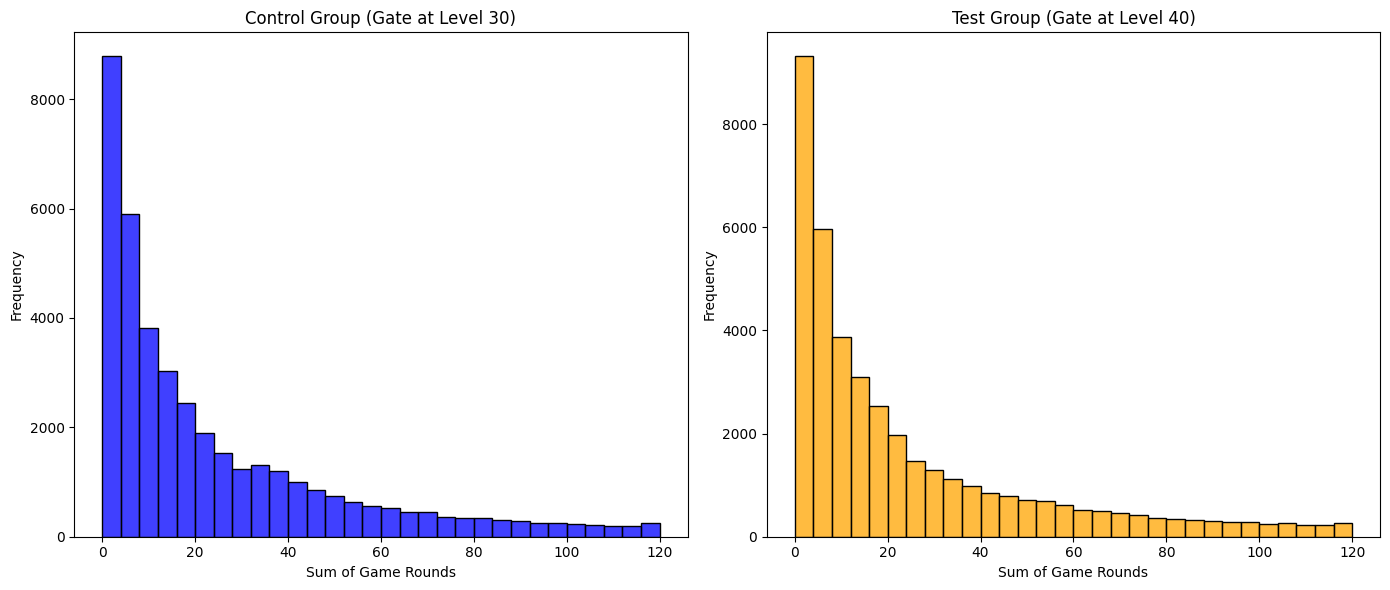

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram for the control group
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.histplot(group30['sum_gamerounds'], bins=30, kde=False, color='blue')
plt.title('Control Group (Gate at Level 30)')
plt.xlabel('Sum of Game Rounds')
plt.ylabel('Frequency')

# Histogram for the test group
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.histplot(group40['sum_gamerounds'], bins=30, kde=False, color='orange')
plt.title('Test Group (Gate at Level 40)')
plt.xlabel('Sum of Game Rounds')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# dividing the 30 gate and 40 gate groups
gate30_gamerounds = df[df["version"] == "gate_30"].loc[:,["userid","sum_gamerounds"]]
gate40_gamerounds = df[df["version"] == "gate_40"].loc[:,["userid","sum_gamerounds"]]

In [10]:

import numpy as np
from scipy.stats import norm

# calculate variance
variance = pd.concat([gate30_gamerounds['sum_gamerounds'],gate40_gamerounds['sum_gamerounds']]).var()

# values to consider
alpha = 0.05
power = 0.80
sigma = np.sqrt(variance)  # standard deviation
delta = 5  # Difference in means we hope to detect

Z = (norm.ppf(1-(alpha/2), loc=0, scale=1) + norm.ppf(power, loc=0, scale=1))**2
var = pd.concat([df['sum_gamerounds'],df['sum_gamerounds']]).var()
sample_size = (Z * 2 * var)/(delta ** 2)

print(f"Required sample size per group: {sample_size}")


Required sample size per group: 474.2109650018927


In [11]:
# choose data randomly from the dataset -> sample data size = 474
gamerounds_sample_group30 = df.sample(n=474, random_state=42)
gamerounds_sample_group40 = df.sample(n=474, random_state=42)

In [12]:
gamerounds_sample_group30.describe()

,userid,sum_gamerounds
count,4.740000e+02,474.000000
mean,4.998116e+06,26.725738
std,2.889354e+06,29.242890
min,3.034800e+04,0.000000
25%,2.450885e+06,5.000000
50%,5.059162e+06,14.000000
75%,7.420578e+06,43.750000
max,9.980675e+06,119.000000


In [13]:
import pandas as pd
from scipy import stats

# Determine the groups 
group30 = gamerounds_sample_group30[gamerounds_sample_group30['version'] == 'gate_30']['sum_gamerounds']
group40 = gamerounds_sample_group40[gamerounds_sample_group40['version'] == 'gate_40']['sum_gamerounds']

# Levene's test for equality of variances
levene_stat, levene_p = stats.levene(group30, group40)

print(f"Levene's test p-value: {levene_p}")

alpha = 0.05

if levene_p >= alpha:
    print("The variances are equal: equal_var=True")
else:
    print("The variances are not equal: equal_var=False")

Levene's test p-value: 0.271332157510269
The variances are equal: equal_var=True


In [14]:
# Calculate the mean sessions for each group
mean_group30 = group30.mean()
mean_group40 = group40.mean()

# Display the means
print(f"Average sessions for gate at level 30: {mean_group30}")
print(f"Average sessions for gate at level 40: {mean_group40}")

# Conducting a two-sample t-test to compare the means
t_stat, p_value = stats.ttest_ind(group40, group30, equal_var=True)

print(f"p-value: {p_value}")

# Assuming an alpha of 0.05 for a 95% confidence level
alpha = 0.05

# Checking if the difference in means is at least 5 sessions
mean_difference = mean_group40 - mean_group30
print(f"Mean difference: {mean_difference}")

# Interpret the results
if p_value < alpha and mean_difference >= 5:
    print("The average number of game sessions has significantly increased by at least 5 sessions with the gate at level 40.")
else:
    print("There is not enough evidence to conclude that the average number of game sessions has increased by at least 5 sessions with the gate at level 40.")


Average sessions for gate at level 30: 27.639344262295083
Average sessions for gate at level 40: 25.756521739130434
p-value: 0.4841448527185047
Mean difference: -1.8828225231646485
There is not enough evidence to conclude that the average number of game sessions has increased by at least 5 sessions with the gate at level 40.


## Question 2 <a id="Section-two" ></a>
- Two Categorical Groups -> z-test
- Define the A and B groups: gate_30 = A (Control Group), gate_40 = B (Treatment Group)

* Null Hypothesis (H0): The retention after 1 day for the version with the gate at level 40 has not increased by 2% compared to the version with the gate at level 30.
* Alternative Hypothesis (H1): The retention after 1 day for the version with the gate at level 40 has increased by 2% compared to the version with the gate at level 30.

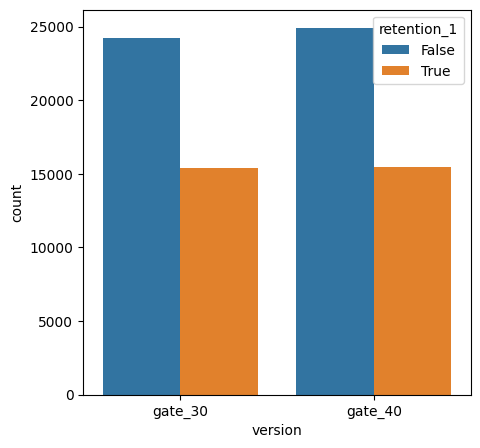

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(df, x='version', hue='retention_1', ax=ax)
plt.show()

In [16]:
cross_tab = pd.crosstab(df['version'], df['retention_1'], normalize='index')
cross_tab

retention_1,False,True
version,,
gate_30,0.610904,0.389096
gate_40,0.616634,0.383366


In [17]:
import scipy.stats as stats
import numpy as np

# Given parameters
alpha = 0.05  # Significance level
beta = 0.20   # 1 - Power
# The baseline retention rate is typically derived from the control group in an A/B testing
# Get the proportion of users in the gate_30 group who were retained after 1 day
p0 = cross_tab.loc['gate_30', True]     # Baseline retention rate
d = 0.02      # Minimum detectable effect (2% increase)

# Z-scores
z_alpha_half = stats.norm.ppf(1 - alpha / 2)
z_beta = stats.norm.ppf(1 - beta)

# Sample size calculation
n = (((z_alpha_half + z_beta)**2) * (p0*(1-p0) + (p0+d)*(1-(p0+d)))) / d**2

# Since we need an integer number of samples, round up
n = np.ceil(n)

print(f"Required sample size per group: {int(n)}")


Required sample size per group: 9408


In [18]:
# choose data randomly from the dataset -> sample data size = 9408
ret1_sample_group30 = df.sample(n=9408, random_state=42)
ret1_sample_group40 = df.sample(n=9408, random_state=42)

In [19]:
from statsmodels.stats.proportion import proportions_ztest


successes = np.array([ret1_sample_group30['retention_1'].sum(), 
                      ret1_sample_group40['retention_1'].sum()])
nobs = np.array([ret1_sample_group30['retention_1'].count(), 
                 ret1_sample_group40['retention_1'].count()])

z_stat, p_value = proportions_ztest(count=successes, nobs=nobs, value=0.02, alternative='larger') # Testing for 2% increase
print(f'Z-statistic for day 1 retention: {z_stat}, P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in proportions.")
else:
    print("Fail to reject the null hypothesis. Proportions are not significantly different.")


Z-statistic for day 1 retention: -2.812071401809339, P-value: 0.9975388212428229
Fail to reject the null hypothesis. Proportions are not significantly different.


## Question 3 <a id="Section-three" ></a>
- Two Categorical Groups -> chi-square
- Define the A and B groups: gate_30 = A (Control Group), gate_40 = B (Treatment Group)

* Null Hypothesis (H0): The retention after 7 days for the version with the gate at level 40 has not increased by 5% compared to the version with the gate at level 30.
* Alternative Hypothesis (H1): The retention after 7 days for the version with the gate at level 40 has increased by 5% compared to the version with the gate at level 30.

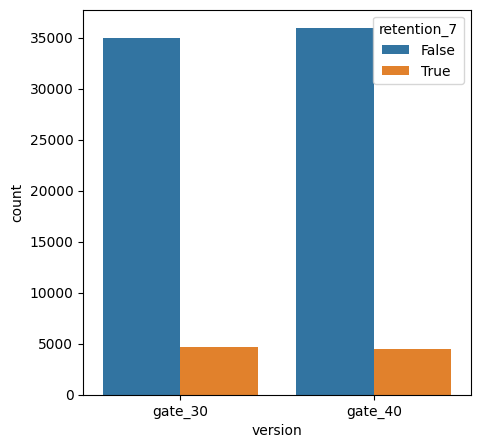

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(df, x='version', hue='retention_7', ax=ax)
plt.show()

In [21]:
cross_tab = pd.crosstab(df['version'], df['retention_7'], normalize='index')
cross_tab

retention_7,False,True
version,,
gate_30,0.881881,0.118119
gate_40,0.890202,0.109798


In [22]:
import scipy.stats as stats
import numpy as np

# Given parameters
alpha = 0.05  # Significance level
beta = 0.20   # 1 - Power
# The baseline retention rate is typically derived from the control group in an A/B testing
# Get the proportion of users in the gate_30 group who were retained after 7 day
p0 = cross_tab.loc['gate_30', True]     # Baseline retention rate
d = 0.05      # Minimum detectable effect (5% increase)

# Z-scores
z_alpha_half = stats.norm.ppf(1 - alpha / 2)
z_beta = stats.norm.ppf(1 - beta)

# Sample size calculation
n = (((z_alpha_half + z_beta)**2) * (p0*(1-p0) + (p0+d)*(1-(p0+d)))) / d**2

# Since we need an integer number of samples, round up
n = np.ceil(n)

print(f"Required sample size per group: {int(n)}")

Required sample size per group: 767


In [23]:
# choose data randomly from the dataset -> sample data size = 767
ret7_sample_group30 = df.sample(n=767, random_state=42)
ret7_sample_group40 = df.sample(n=767, random_state=42)

In [24]:
# concat the samples 
concat_samples = pd.concat([ret7_sample_group30, ret7_sample_group40])

In [25]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(concat_samples['version'], concat_samples['retention_7'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2}, P-value: {p_value}")

alpha = 0.05  # Alpha level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant difference in 7-day retention rates between the two versions.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant difference in 7-day retention rates between the two versions.")


Chi-square Statistic: 0.3038176291537896, P-value: 0.5814989495376172
Fail to reject the null hypothesis.
There is no statistically significant difference in 7-day retention rates between the two versions.
